 # Step 1: Xem các thông tin của dữ liệu và vẽ biểu đồ để hiểu hơn về dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from CSV
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Ta sẽ chuyển các kiểu dữ liệu object về category

In [5]:
features = [i for i in df.columns]
features.remove("Age")
features.remove("Billing Amount")
features.remove("Room Number")

def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype('category')

convert_cat(df, features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                10000 non-null  category
 1   Age                 10000 non-null  int64   
 2   Gender              10000 non-null  category
 3   Blood Type          10000 non-null  category
 4   Medical Condition   10000 non-null  category
 5   Date of Admission   10000 non-null  category
 6   Doctor              10000 non-null  category
 7   Hospital            10000 non-null  category
 8   Insurance Provider  10000 non-null  category
 9   Billing Amount      10000 non-null  float64 
 10  Room Number         10000 non-null  int64   
 11  Admission Type      10000 non-null  category
 12  Discharge Date      10000 non-null  category
 13  Medication          10000 non-null  category
 14  Test Results        10000 non-null  category
dtypes: category(12), float64(1), int64(2)

In [6]:
df.describe(include = ['category'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [7]:
df['Test Results'].value_counts()

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

In [8]:
df['Test Results'].value_counts(normalize=True).to_frame()

,proportion
Test Results,
Abnormal,0.3456
Inconclusive,0.3277
Normal,0.3267


<Axes: xlabel='Test Results', ylabel='count'>

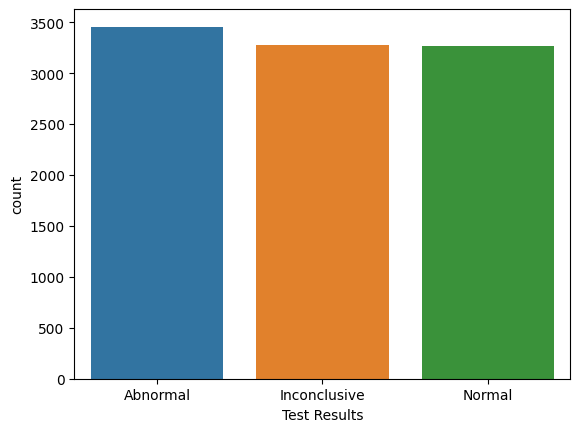

In [9]:
sns.countplot(df, x = 'Test Results')

<Axes: xlabel='Gender', ylabel='count'>

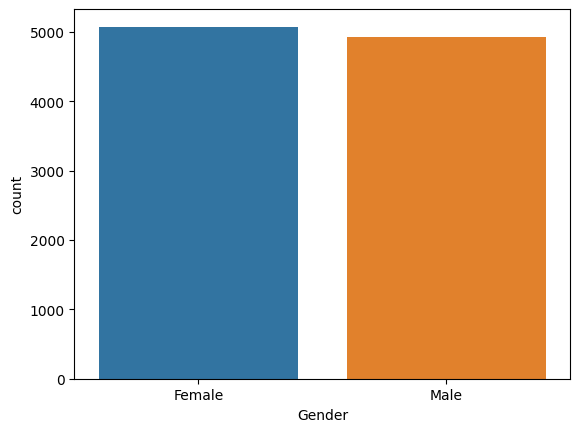

In [10]:
# Ta vẽ các biểu đồ tương tự với các kiểu category khác
sns.countplot(df, x = 'Gender')

<Axes: xlabel='Blood Type', ylabel='count'>

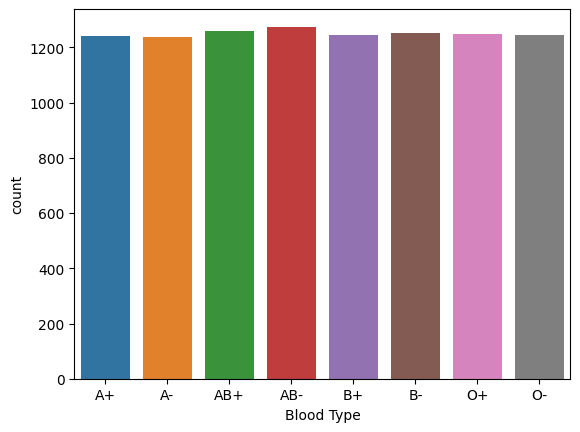

In [11]:
sns.countplot(df, x="Blood Type")

<Axes: xlabel='Medical Condition', ylabel='count'>

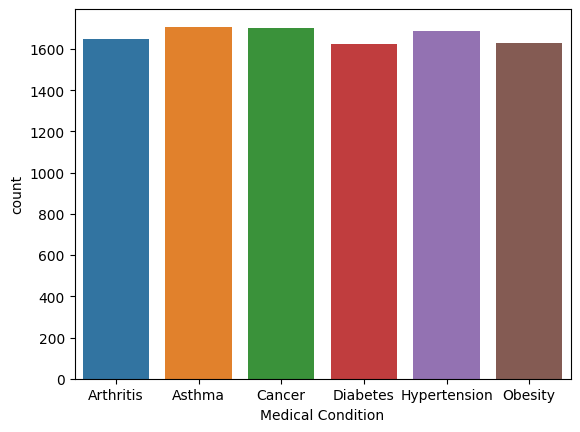

In [12]:
sns.countplot(df, x="Medical Condition")

<Axes: xlabel='Admission Type', ylabel='count'>

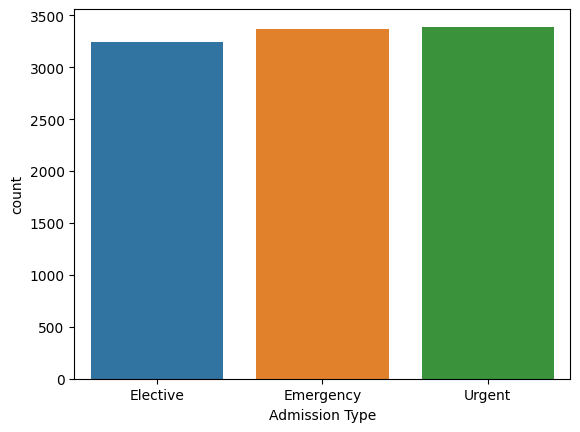

In [14]:
sns.countplot(df, x="Admission Type")

<Axes: xlabel='Medication', ylabel='count'>

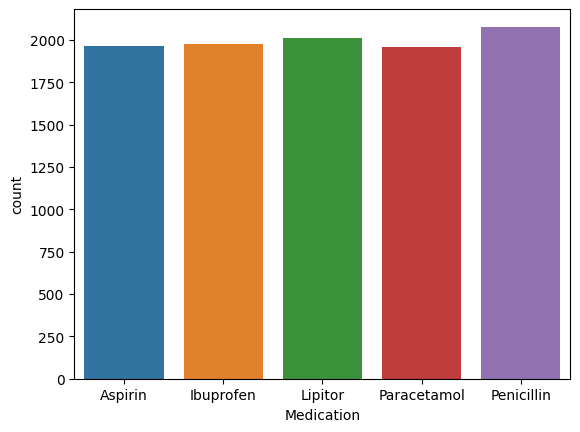

In [15]:
sns.countplot(df, x="Medication")